In [1]:
#Implementation of ML model
import pandas as pd
import numpy as np
macro_and_stock_df = pd.read_csv('macro_and_stock_df.csv')
macro_and_stock_df
# Remove rows with NaN values
cleaned_df = macro_and_stock_df.dropna()
cleaned_df.head()

,GDP,UNRATE,CPIAUCSL,RSAFS,INDPRO,Inflation_Level,GDP_Growth_Rate,GDP_Growth_Stage,open,high,low,close,volume
30,10984.040,5.8,180.0,290385.0,90.6436,High,0.887076,Stagnation,14.00,14.65,13.90,14.39,327500.0
33,11061.433,5.7,181.2,289576.0,90.3988,High,0.704595,Stagnation,9.93,9.94,9.25,9.50,275000.0
39,11312.766,6.0,183.2,295600.0,90.4311,High,1.240696,Stagnation,20.50,20.58,18.56,18.96,1215700.0
42,11566.669,6.2,183.7,302747.0,90.9869,High,2.244394,Growth,25.60,25.60,24.26,24.75,882600.0
45,11772.234,6.0,184.9,304809.0,91.5049,High,1.777219,Stagnation,33.60,35.49,33.40,34.51,991200.0


In [2]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [3]:
def line_of_best_fit(X, y): 
    """
    Args:
        X (array): can be either 1-d or 2-d which includes all the predictor values, not including bias term
        y (array): a 1-d array with values to be predicted
    
    Returns:
        m (array): an array containing the coefficients for the line of best fit, including the intercept term
    """
    # add bias column
    X = add_bias_column(X)

    # calculate line of best fit
    m = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
    
    return m

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_true - y_pred) ** 2)

def show_fit(X, y, slope, intercept):
    plt.figure()
    
    # in case this wasn't done before, transform the input data into numpy arrays and flatten them
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.3f} * x + {intercept:.3f}, MSE = {mse:.3f}')

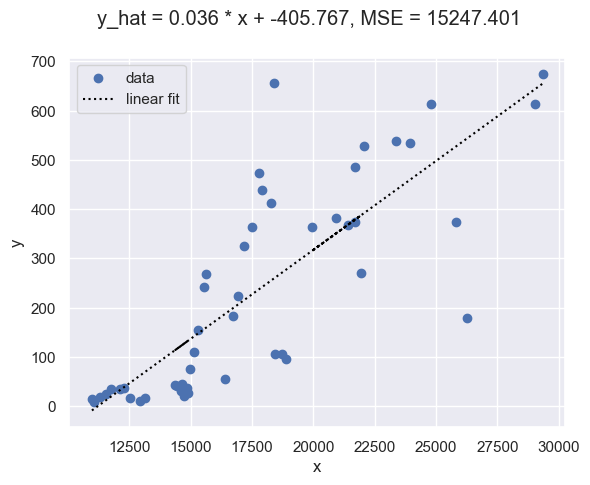

In [5]:
X = cleaned_df['GDP'].to_numpy()
y = cleaned_df['close'].to_numpy()

best_fit_line = line_of_best_fit(X, y)
show_fit(X, y, best_fit_line[1], best_fit_line[0])

#### Discussion of Preliminary Results
The provided linear regression model uses GDP as the independent variable to predict Netflix's stock price. The equation suggest a positive relationship between GDP and Netflix's stock price. For every unit increase in GDP, the stock price of Netflix increases by 0.036 units. In evaluating the assumptions of the linear regression model relating GDP to Netflix's stock price, we must consider independence, constant variance, linearity, and normality. Independence assumes that each observation of GDP and stock price is independent of the others, which is reasonable since the data points are sampled at specific, non-overlapping time points. However, current stock prices are often influenced by prior prices due to market trends or investor behavior. This means that independence may not be completely met, but we can assume that it is reasonably met. Linearity assumes that the relationship between GDP and stock price can be adequately modeled by a straight line, as represented by the fitted regression line. While the plot shows a general upward trend, deviations from the line at higher GDP values suggest that a purely linear relationship may not fully capture the dynamics, warranting further investigation. Constant variance assumes that the residuals have equal variance across all levels of GDP. However, the scatter plot shows increased spread in stock prices as GDP rises. 
